## Analyzing Profitability and Leverage Ratios

This Python notebook is tailored for financial analysis, with a specific emphasis on evaluating financial ratios to make well-informed investment decisions, particularly within the real estate sector. 

The main goal is to compute and interpret financial ratios, specifically those pertaining to profitability and leverage, using income statements and balance sheets. This analysis is intended to offer insights into the performance and risk characteristics of these companies, providing valuable information for an investment analysis.


## Importing Libraries and Reading the Data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Read in the files
balance_sheet = pd.read_excel("datasets/Balance_Sheet.xlsx")
income_statement = pd.read_excel("datasets/Income_Statement.xlsx")

## Exploring the Data

In [5]:
# Display balance_sheet
balance_sheet.head()

,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [6]:
# Display income_statement
income_statement.head()

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


## Merging Datasets

In [7]:
# Merge both the dataframes
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

## Computing Profitability Ratios

In [22]:
# Compute gross margin ratio
df_ratios["gross_margin_profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# Compute operating margin ratio
df_ratios["operating_margin_profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

## Computing Leverage Ratios

In [10]:
# Compute debt-to-equity ratio
df_ratios["debt_to_equity_leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Compute equity multiplier ratio
df_ratios["equity_multiplier_leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]


## Lowest Average Profitability Ratio

In [15]:
# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values= "operating_margin_profitability_ratio"))

           operating_margin_profitability_ratio
comp_type                                      
fmcg                                   0.207112
real_est                               0.299938
tech                                   0.273889


##### The industry with the lowest profitability is Fast-Moving Consumer Goods (fmcg).

## Highest Average Leverage Ratio

In [17]:
# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="debt_to_equity_leverage_ratio"))

           debt_to_equity_leverage_ratio
comp_type                               
fmcg                            2.997896
real_est                        5.692041
tech                            1.777448


##### The industry with the highest leverage is Real Estate.

## Relationship between Leverage and Profitability in the Real Estate Companies 

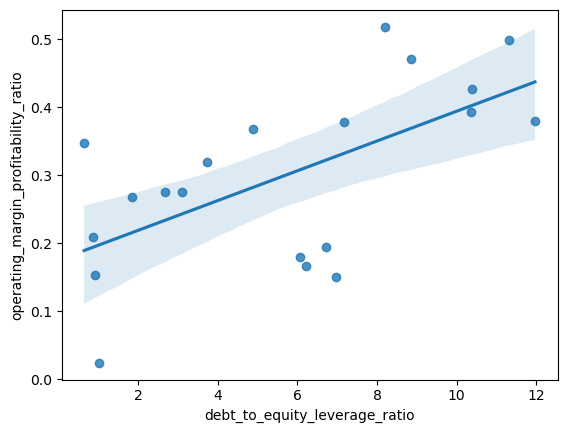

In [23]:
# Scatter Plot 
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="debt_to_equity_leverage_ratio", y="operating_margin_profitability_ratio")

##### The plot shows that the relationship is positive, so the real estate companies with higher leverage ratio have higher profitability.